# Classifying using Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv("Logistic_X_Train.csv")
Y_train = pd.read_csv("Logistic_Y_Train.csv")

In [3]:
X_train = X_train.values
Y_train = Y_train.values
print(X_train.shape , Y_train.shape)

(3000, 3) (3000, 1)


In [4]:
#normalising the data
X = (X_train - X_train.mean())/X_train.std()

In [5]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def hypothesis(X,theta):
    return sigmoid(np.dot(X,theta))

def error(X,Y,theta):
    m = X.shape[0]
    hi = hypothesis(X,theta)
    e = -1*np.mean(Y*np.log(hi) + (1-Y)*np.log(1-hi))
    return e

def gradient(X,Y,theta):
    m = X.shape[0]
    h = hypothesis(X,theta)
    grad = np.dot(X.T,(Y-h))
    return grad/m

def gradient_descent(X,Y,lr=0.4,max_epochs=5000):
    error_list = []
    n = X.shape[1]
    theta = np.zeros((n,1))
    for i in range(max_epochs):
        e = error(X,Y,theta)
        error_list.append(e)
        grad = gradient(X,Y,theta)
        theta = theta + lr*grad
    
    return error_list,theta

In [6]:
#Adding the dummy feature in X_train for theta0
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
print(X.shape)

(3000, 4)


In [7]:
error_list,theta = gradient_descent(X,Y_train)

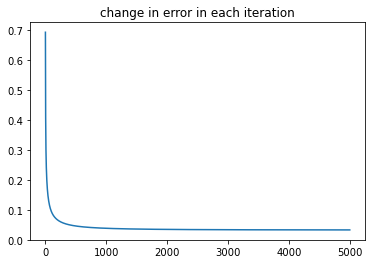

In [8]:
plt.title("change in error in each iteration")
plt.plot(error_list)
plt.show()

In [9]:
def predict(X,theta):
    h = hypothesis(X,theta)
    output = np.zeros(h.shape)
    output[h>=0.5] = 1
    output = output.astype('int')
    return output

Ypred = predict(X,theta)
print(Ypred[:5,:])

[[1]
 [1]
 [1]
 [0]
 [0]]


In [11]:
def accuracy(Y,Ypred):
    Y = Y.reshape((-1,1))
    return np.sum(Y == Ypred)/Y.shape[0]

acc = accuracy(Y_train,Ypred)*100

print("Accuracy of the model is " + str(acc) + " %")

Accuracy of the model is 99.53333333333333 %


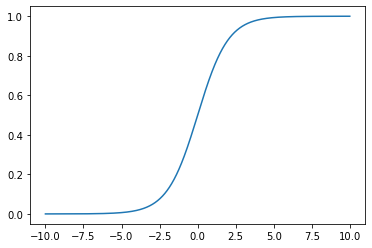

In [27]:
x = np.arange(-10,10,0.01)
data = sigmoid(x)
plt.plot(x,data)